In [4215]:
import pandas as pd

athlete_data = pd.read_csv("2025_Problem_C_Data/summerOly_athletes.csv",  encoding = 'unicode_escape')
host_data = pd.read_csv("2025_Problem_C_Data/summerOly_hosts.csv",  encoding = "utf-8")
medal_table = pd.read_csv("2025_Problem_C_Data/summerOly_medal_counts.csv",  encoding = "utf-8")
event_data = pd.read_csv("2025_Problem_C_Data/summerOly_programs.csv",  encoding = 'unicode_escape')

test = medal_table[medal_table['NOC'] == 'Greece']
test.head()
test['Total'].sum()


np.int64(128)

In [4216]:
replacement_dict = {
    'Soviet Union': 'Russia',
    'Czechoslovakia': 'Czech Republic',
    'East Germany': 'Germany',
    'West Germany': 'Germany',
    'Yugoslavia': 'Serbia',
    'Bohemia': 'Czech Republic',
    'United Team of Germany': 'Germany',
    'Australasia': 'Australia',
    'ROC': 'Russia', 
    'Unified Team': 'Russia',
    'Formosa': 'Chinese Taipei',  # Taiwan
    'Serbia and Montenegro': 'Serbia',  # Simplified to Serbia
    'FR Yugoslavia': 'Serbia',  # Simplified to Serbia
    'Mixed team': None,  
    'Independent Olympic Athletes': None,  
    'Independent Olympic Participants': None,  
    'Russian Empire' : "Russia",
    'Ceylon' : 'Sri Lanka', 
    'Refugee Olympic Team': None,
    'Netherlands Antilles' : "Netherlands"
}

"""
Australasia |	Australia and New Zealand (split evenly or weighted by participation)
Bohemia | 	Czech Republic
Czechoslovakia |	Czech Republic and Slovakia (split evenly or weighted by participation)
East Germany| Germany
FR Yugoslavia	| Serbia (or other successor states: Montenegro, Croatia, etc., if needed)
Formosa	| Chinese Taipei (Taiwan)
Mixed team	| Disregard (not a specific country)
North Macedonia	| Republic of North Macedonia
Serbia and Montenegro	| Serbia and Montenegro (as separate entities today)
Soviet Union	| Russia (and/or successor states: Ukraine, Belarus, etc.)
United Team of Germany	| Germany
West Germany	| Germany
Yugoslavia	| Serbia (or other successor states: Croatia, Bosnia, etc.)
ROC (Russian Olympic Committee) |	Russia
Unified Team | Russia (and/or successor states: Ukraine, Belarus, etc.)
Independent Olympic Athletes | Disregard or keep as-is (depending on modeling needs)
Independent Olympic Participants | Disregard or keep as-is
"""

medal_table['NOC'] = medal_table['NOC'].str.replace('\xa0', ' ').str.strip()

medal_table['NOC'] = medal_table['NOC'].replace(replacement_dict)




unique_countries = medal_table['NOC'].unique()
unique_years = medal_table['Year'].unique()

len(unique_countries)

medal_table_chn = medal_table[medal_table['NOC'] == 'China']

medal_table_chn

print(unique_countries)


['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' None 'Belgium' 'Italy'
 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands' 'India'
 'Czech Republic' 'Sweden' 'Russia' 'Finland' 'South Africa' 'Estonia'
 'Brazil' 'Japan' 'New Zealand' 'Serbia' 'Argentina' 'Uruguay' 'Poland'
 'Haiti' 'Portugal' 'Romania' 'Egypt' 'Ireland' 'Chile' 'Philippines'
 'Mexico' 'Latvia' 'Turkey' 'Jamaica' 'Peru' 'Sri Lanka'
 'Trinidad and Tobago' 'Panama' 'South Korea' 'Iran' 'Puerto Rico'
 'Lebanon' 'Bulgaria' 'Venezuela' 'Iceland' 'Pakistan' 'Bahamas'
 'Ethiopia' 'Chinese Taipei' 'Ghana' 'Morocco' 'Singapore'
 'British West Indies' 'Iraq' 'Tunisia' 'Kenya' 'Nigeria' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Algeria' 'Dominican Republic' 'Zambia' 'Suriname' 'Costa Rica'
 'Indonesia' 'Senegal' 'Virgin Islands' 'Djibouti

In [4217]:
all_years_countries = pd.DataFrame([(year, country) for year in unique_years for country in unique_countries], columns=['Year', 'NOC'])


expanded_table = pd.merge(all_years_countries, medal_table, on=['Year', 'NOC'], how='left')


expanded_table[['Gold', 'Silver', 'Bronze', 'Total']] = expanded_table[['Gold', 'Silver', 'Bronze', 'Total']].fillna(0)


expanded_table = expanded_table.drop(columns=['Rank'], errors='ignore')

expanded_table.head(20)

,Year,NOC,Gold,Silver,Bronze,Total
0,1896,United States,11.0,7.0,2.0,20.0
1,1896,Greece,10.0,18.0,19.0,47.0
2,1896,Germany,6.0,5.0,2.0,13.0
3,1896,France,5.0,4.0,2.0,11.0
4,1896,Great Britain,2.0,3.0,2.0,7.0
5,1896,Hungary,2.0,1.0,3.0,6.0
6,1896,Austria,2.0,1.0,2.0,5.0
7,1896,Australia,2.0,0.0,0.0,2.0
8,1896,Denmark,1.0,2.0,3.0,6.0
9,1896,Switzerland,1.0,2.0,0.0,3.0


In [4218]:

expanded_table = expanded_table.sort_values(['NOC', 'Year'])

def compute_historical_totals(group):
    group = group.copy()
    group['Historical_Total_Medals'] = group['Total'].cumsum().shift(1, fill_value=0)
    group['Historical_Gold_Medals'] = group['Gold'].cumsum().shift(1, fill_value=0)
    return group

expanded_table = expanded_table.groupby('NOC', group_keys=False).apply(compute_historical_totals)




/var/folders/0f/629g1d_s7gxcw0kmkkqrxksc0000gn/T/ipykernel_2878/1403944573.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_table = expanded_table.groupby('NOC', group_keys=False).apply(compute_historical_totals)


In [4219]:
replace = {"Japan (postponed to 2021 due to the coronavirus pandemic)" : "Japan",
           "Soviet Union" : "Russia",
           "United Kingdom" : "Great Britain"}

host_data['Host_Country'] = host_data['Host'].str.split(",").str[-1].str.strip()

host_data = host_data[~host_data['Host'].str.contains('Cancelled', case=False, na=False)]

host_data['Host_Country'].unique()

host_data['Host_Country'] = host_data['Host_Country'].replace(replace)

host_data.head(20)



,Year,Host,Host_Country
0,1896,"Athens, Greece",Greece
1,1900,"Paris, France",France
2,1904,"St. Louis, United States",United States
3,1908,"London, United Kingdom",Great Britain
4,1912,"Stockholm, Sweden",Sweden
6,1920,"Antwerp, Belgium",Belgium
7,1924,"Paris, France",France
8,1928,"Amsterdam, Netherlands",Netherlands
9,1932,"Los Angeles, United States",United States
10,1936,"Berlin, Germany",Germany


In [4220]:

expanded_table = expanded_table.merge(
    host_data[['Year', 'Host_Country']],
    left_on=['Year', 'NOC'],
    right_on=['Year', 'Host_Country'],
    how='left'
)
expanded_table['Is_Host'] = expanded_table['Host_Country'].notnull().astype(int)


expanded_table.drop('Host_Country', axis=1, inplace=True)

print(expanded_table[expanded_table['Is_Host'] == 1])

      Year            NOC  Gold  Silver  Bronze  Total  \
162   1956      Australia  13.0     8.0    14.0   35.0   
173   2000      Australia  16.0    25.0    17.0   58.0   
365   1920        Belgium  14.0    11.0    11.0   36.0   
477   2016         Brazil   7.0     6.0     6.0   19.0   
677   1976         Canada   0.0     5.0     6.0   11.0   
745   2008          China  48.0    22.0    30.0  100.0   
1271  1952        Finland   6.0     3.0    13.0   22.0   
1291  1900         France  27.0    39.0    37.0  103.0   
1296  1924         France  13.0    15.0    10.0   38.0   
1319  2024         France  16.0    26.0    22.0   64.0   
1389  1936        Germany  38.0    31.0    32.0  101.0   
1447  1908  Great Britain  56.0    51.0    39.0  146.0   
1454  1948  Great Britain   3.0    14.0     6.0   23.0   
1470  2012  Great Britain  29.0    18.0    18.0   65.0   
1474  1896         Greece  10.0    18.0    19.0   47.0   
1498  2004         Greece   6.0     6.0     4.0   16.0   
1907  1960    

In [4221]:
noc_to_country = {
    'USA': 'United States',
    'GRE': 'Greece',
    'GER': 'Germany',
    'FRA': 'France',
    'GBR': 'Great Britain',
    'HUN': 'Hungary',
    'AUT': 'Austria',
    'AUS': 'Australia',
    'DEN': 'Denmark',
    'SUI': 'Switzerland',
    'BEL': 'Belgium',
    'ITA': 'Italy',
    'CUB': 'Cuba',
    'CAN': 'Canada',
    'ESP': 'Spain',
    'LUX': 'Luxembourg',
    'NOR': 'Norway',
    'NED': 'Netherlands',
    'IND': 'India',
    'CZE': 'Czech Republic',
    'SWE': 'Sweden',
    'RUS': 'Russia',
    'FIN': 'Finland',
    'RSA': 'South Africa',
    'EST': 'Estonia',
    'BRA': 'Brazil',
    'JPN': 'Japan',
    'NZL': 'New Zealand',
    'SRB': 'Serbia',
    'ARG': 'Argentina',
    'URU': 'Uruguay',
    'POL': 'Poland',
    'HAI': 'Haiti',
    'POR': 'Portugal',
    'ROU': 'Romania',
    'EGY': 'Egypt',
    'IRL': 'Ireland',
    'CHI': 'Chile',
    'PHI': 'Philippines',
    'MEX': 'Mexico',
    'LAT': 'Latvia',
    'TUR': 'Turkey',
    'JAM': 'Jamaica',
    'PER': 'Peru',
    'SRI': 'Sri Lanka',
    'TTO': 'Trinidad and Tobago',
    'PAN': 'Panama',
    'KOR': 'South Korea',
    'IRI': 'Iran',
    'PUR': 'Puerto Rico',
    'LBN': 'Lebanon',
    'BUL': 'Bulgaria',
    'VEN': 'Venezuela',
    'ISL': 'Iceland',
    'PAK': 'Pakistan',
    'BAH': 'Bahamas',
    'ETH': 'Ethiopia',
    'TPE': 'Chinese Taipei',
    'GHA': 'Ghana',
    'MAR': 'Morocco',
    'SGP': 'Singapore',
    'BWI': 'British West Indies',
    'IRQ': 'Iraq',
    'TUN': 'Tunisia',
    'KEN': 'Kenya',
    'NGR': 'Nigeria',
    'MGL': 'Mongolia',
    'UGA': 'Uganda',
    'CMR': 'Cameroon',
    'TWN': 'Taiwan',
    'PRK': 'North Korea',
    'COL': 'Colombia',
    'NIG': 'Niger',
    'BER': 'Bermuda',
    'THA': 'Thailand',
    'ZIM': 'Zimbabwe',
    'TAN': 'Tanzania',
    'GUY': 'Guyana',
    'CHN': 'China',
    'CIV': 'Ivory Coast',
    'SYR': 'Syria',
    'ALG': 'Algeria',
    'DOM': 'Dominican Republic',
    'ZAM': 'Zambia',
    'SUR': 'Suriname',
    'CRC': 'Costa Rica',
    'INA': 'Indonesia',
    'SEN': 'Senegal',
    'ISV': 'Virgin Islands',
    'DJI': 'Djibouti',
    'LTU': 'Lithuania',
    'NAM': 'Namibia',
    'CRO': 'Croatia',
    'ISR': 'Israel',
    'SLO': 'Slovenia',
    'MAS': 'Malaysia',
    'QAT': 'Qatar',
    'UKR': 'Ukraine',
    'KAZ': 'Kazakhstan',
    'BLR': 'Belarus',
    'SVK': 'Slovakia',
    'ARM': 'Armenia',
    'BDI': 'Burundi',
    'ECU': 'Ecuador',
    'HKG': 'Hong Kong',
    'MDA': 'Moldova',
    'UZB': 'Uzbekistan',
    'AZE': 'Azerbaijan',
    'TGA': 'Tonga',
    'GEO': 'Georgia',
    'MOZ': 'Mozambique',
    'KSA': 'Saudi Arabia',
    'VIE': 'Vietnam',
    'BAR': 'Barbados',
    'KUW': 'Kuwait',
    'KGZ': 'Kyrgyzstan',
    'MKD': 'Macedonia',
    'UAE': 'United Arab Emirates',
    'PAR': 'Paraguay',
    'ERI': 'Eritrea',
    'TJK': 'Tajikistan',
    'SAM': 'Samoa',
    'SUD': 'Sudan',
    'AFG': 'Afghanistan',
    'MRI': 'Mauritius',
    'TOG': 'Togo',
    'BRN': 'Bahrain',
    'GRN': 'Grenada',
    'BOT': 'Botswana',
    'CYP': 'Cyprus',
    'GAB': 'Gabon',
    'GUA': 'Guatemala',
    'MNE': 'Montenegro',
    'FIJ': 'Fiji',
    'JOR': 'Jordan',
    'KOS': 'Kosovo',
    'SMR': 'San Marino',
    'NMA': 'North Macedonia',
    'TKM': 'Turkmenistan',
    'BUR': 'Burkina Faso',
    'LCA': 'Saint Lucia',
    'DMA': 'Dominica',
    'ALB': 'Albania',
    'CPV': 'Cabo Verde',
}


participant_counts = (
    athlete_data.groupby(['Year', 'NOC'])
    .size()
    .reset_index(name='Participant_Count')
)

participant_counts['NOC'] = participant_counts['NOC'].replace(noc_to_country)

participant_counts

expanded_table = expanded_table.merge(
    participant_counts,
    on=['Year', 'NOC'],  
    how='left'
)

expanded_table['Participant_Count'] = expanded_table['Participant_Count'].fillna(0)

expanded_table['Is_Participated'] = (expanded_table['Participant_Count'] > 0).astype(int)



In [4222]:

expanded_table['Previous_Medals'] = expanded_table.groupby('NOC')['Total'].shift(1)
expanded_table['Previous_Participants'] = expanded_table.groupby('NOC')['Participant_Count'].shift(1)

expanded_table['Previous_Participants'] = expanded_table['Previous_Participants'].fillna(0)



expanded_table['Past_Medal_Efficiency'] = (
    expanded_table['Previous_Medals'] / expanded_table['Previous_Participants']
)


expanded_table['Past_Medal_Efficiency'] = expanded_table['Past_Medal_Efficiency'].fillna(0)

expanded_table['Previous_Gold'] = expanded_table.groupby('NOC')['Gold'].shift(1)
expanded_table['Previous_Silver'] = expanded_table.groupby('NOC')['Silver'].shift(1)
expanded_table['Previous_Bronze'] = expanded_table.groupby('NOC')['Bronze'].shift(1)
expanded_table['Previous_Total'] = expanded_table.groupby('NOC')['Total'].shift(1)


expanded_table[['Previous_Gold', 'Previous_Silver', 'Previous_Bronze', 'Previous_Total']] = expanded_table[
    ['Previous_Gold', 'Previous_Silver', 'Previous_Bronze', 'Previous_Total']
].fillna(0)

expanded_table.to_csv('2025_Problem_C_Data/final.csv', index = False)

In [4223]:
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
#Important to learn this to write abt 
from sklearn.ensemble import HistGradientBoostingRegressor



In [4224]:

expanded_table = expanded_table.sort_values(by='Year')



split_year = 2016  

features = ['Year', 'Previous_Participants', 'Is_Host', 'Historical_Total_Medals', 'Past_Medal_Efficiency', 'Previous_Gold', 'Previous_Silver', 'Previous_Bronze', 'Previous_Total']

#what we want to predict.. put whatever feature, works best on Bronze, Silver, Gold, Total, enter these keywords exactly 
target = 'Gold'


train_data = expanded_table[expanded_table['Year'] <= split_year]
test_data = expanded_table[expanded_table['Year'] > split_year]



# Extract features and target
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Verify the splits, just to dub check

print(f"Training data years: {X_train['Year'].min()} to {X_train['Year'].max()}")
print(f"Testing data years: {X_test['Year'].min()} to {X_test['Year'].max()}")


Training data years: 1896 to 2016
Testing data years: 2020 to 2024


In [4225]:
import numpy as np

"""
X = np.nan_to_num(X_train['Past_Medal_Efficiency'], nan=0.0, posinf=0.0, neginf=0.0)
X = np.nan_to_num(X_test['Past_Medal_Efficiency'], nan=0.0, posinf=0.0, neginf=0.0)

print("NaN values in X:", np.isnan(X_test).any())

# Check for infinity values
print("Infinite values in X:", np.isinf(X_test).any())
"""

'\nX = np.nan_to_num(X_train[\'Past_Medal_Efficiency\'], nan=0.0, posinf=0.0, neginf=0.0)\nX = np.nan_to_num(X_test[\'Past_Medal_Efficiency\'], nan=0.0, posinf=0.0, neginf=0.0)\n\nprint("NaN values in X:", np.isnan(X_test).any())\n\n# Check for infinity values\nprint("Infinite values in X:", np.isinf(X_test).any())\n'

In [4226]:
model = HistGradientBoostingRegressor(max_iter=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

/Users/vishnuvaradhan/Desktop/MCMOlympicMedals/myenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


HistGradientBoostingRegressor(max_depth=5, random_state=42)

In [4227]:
y_pred = model.predict(X_test)

In [4228]:






comparison_df = X_test.copy()
comparison_df['Actual_Total_Medals'] = y_test
comparison_df['Predicted_Total_Medals'] = y_pred




In [4229]:
result = comparison_df[comparison_df['Actual_Total_Medals'] == 126]
print(result)

Empty DataFrame
Columns: [Year, Previous_Participants, Is_Host, Historical_Total_Medals, Past_Medal_Efficiency, Previous_Gold, Previous_Silver, Previous_Bronze, Previous_Total, Actual_Total_Medals, Predicted_Total_Medals]
Index: []


In [4230]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


RMSE: 3.2580914775450553


['Previous_Silver', 'Year', 'Past_Medal_Efficiency', 'Previous_Participants', 'Previous_Bronze', 'Is_Host', 'Previous_Total', 'Previous_Gold', 'Historical_Total_Medals'] [-0.01748581  0.          0.03529836  0.05115827  0.05356034  0.0664245
  0.26802729  0.33605885  0.68165452]


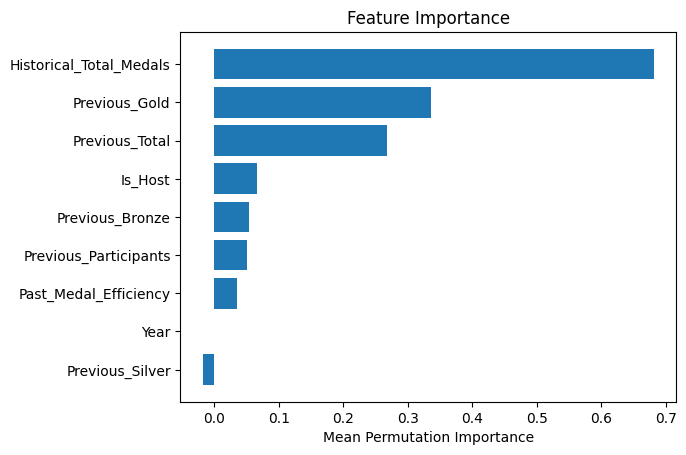

In [4231]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


sorted_idx = perm_importance.importances_mean.argsort()

print([features[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx])

# Plotting our feature importance
plt.barh([features[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Mean Permutation Importance')
plt.show()

In [4232]:
input_2028 = {
    'Year': [1924],
    'Previous_Participants': 272.0,
    'Is_Host': [0],  # 1 if the country is hosting 0 if not
    'Historical_Total_Medals': 2525.0,
    'Past_Medal_Efficiency': 0.16828929068150209,
    'Previous_Gold' : 46.0,
    'Previous_Silver' : 37.0,
    'Previous_Bronze' :38.0,
    'Previous_Total' : 121.0
}

input_2028_df = pd.DataFrame(input_2028)

total = model.predict(input_2028_df)

pred = float(total[0])

print(f"The prediction for this country for {input_2028['Year'][0]} is {pred} {target} Medals!")



The prediction for this country for 1924 is 31.720149994895337 Gold Medals!


In [4233]:
expanded_table_2024 = expanded_table[expanded_table['Year'] == 2024]

sorted_expanded = expanded_table_2024.sort_values(by = 'Historical_Total_Medals', ascending= False)

sorted_expanded.head()





,Year,NOC,Gold,Silver,Bronze,Total,Historical_Total_Medals,Historical_Gold_Medals,Is_Host,Participant_Count,Is_Participated,Previous_Medals,Previous_Participants,Past_Medal_Efficiency,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_Total
4114,2024,United States,40.0,44.0,42.0,126.0,2638.0,1065.0,0,854.0,1,113.0,856.0,0.132009,39.0,41.0,33.0,113.0
3154,2024,Russia,0.0,0.0,0.0,0.0,1624.0,608.0,0,0.0,0,71.0,0.0,inf,20.0,28.0,23.0,71.0
1413,2024,Germany,12.0,13.0,8.0,33.0,1402.0,445.0,0,647.0,1,37.0,597.0,0.061977,10.0,11.0,16.0,37.0
1473,2024,Great Britain,14.0,22.0,29.0,65.0,916.0,285.0,0,533.0,1,64.0,548.0,0.116788,22.0,20.0,22.0,64.0
1319,2024,France,16.0,26.0,22.0,64.0,753.0,224.0,1,801.0,1,33.0,538.0,0.061338,10.0,12.0,11.0,33.0


In [4234]:
def predict_df(prediction_year):
 
    expanded_table_pred_data = expanded_table[expanded_table['Year'] == prediction_year - 4]
    sorted_expanded = expanded_table_pred_data.sort_values(by='Historical_Total_Medals', ascending=False)
    

    predictions = []
    

    for _, row in sorted_expanded.iterrows():
   
        input_data = {
            'Year': [prediction_year],
            'Previous_Participants': row['Participant_Count'],
            'Is_Host': [row['Is_Host']],  
            'Historical_Total_Medals': row['Historical_Total_Medals'],
            'Past_Medal_Efficiency': row['Past_Medal_Efficiency'],
            'Previous_Gold': row['Previous_Gold'],
            'Previous_Silver': row['Previous_Silver'],
            'Previous_Bronze': row['Previous_Bronze'],
            'Previous_Total': row['Previous_Total']

        }
        

        input_df = pd.DataFrame(input_data)
        

        total = model.predict(input_df)
        predictions.append(float(total[0])) 
    

    sorted_expanded[f'Predicted_Medals_{prediction_year}'] = predictions
    
    return sorted_expanded


pred_year = 2028
predicted_2028 = predict_df(pred_year)

predicted_2028_final = predicted_2028[['NOC', target, f'Predicted_Medals_{pred_year}']]

predicted_2028_final = predicted_2028_final.rename(columns={target: '2024_' + target, f'Predicted_Medals_{pred_year}': f'Predicted_Medals_{target}_{pred_year}' })

print(predicted_2028_final)

predicted_2028_final.to_csv(f"results/Predicted_Medals_2028_{target}.csv", index = False)


                NOC  2024_Gold  Predicted_Medals_Gold_2028
4114  United States       40.0                   30.343840
3154         Russia        0.0                   24.894971
1413        Germany       12.0                   19.540571
1473  Great Britain       14.0                   28.756484
1319         France       16.0                   27.886505
...             ...        ...                         ...
3574          Sudan        0.0                    0.076115
1049       Dominica        1.0                    0.076115
629      Cabo Verde        0.0                    0.076115
59          Albania        0.0                    0.076115
3184    Saint Lucia        1.0                    0.076115

[144 rows x 3 columns]


In [4235]:
gold = pd.read_csv('results/Predicted_Medals_2028_Gold.csv')
silver = pd.read_csv('results/Predicted_Medals_2028_Silver.csv')
bronze = pd.read_csv('results/Predicted_Medals_2028_Bronze.csv')
total = pd.read_csv('results/Predicted_Medals_2028_Total.csv')


final_prediction_table = gold.merge(silver, on='NOC')

final_prediction_table = final_prediction_table.merge(bronze, on = 'NOC')

final_prediction_table = final_prediction_table.merge(total, on = 'NOC')

final_prediction_table.head()

final_prediction_table.to_csv('results/final_predictions_2028.csv', index = 'False')

In [4236]:
def predict_df_residuals(prediction_year):

    expanded_table_pred_data = expanded_table[expanded_table['Year'] == prediction_year - 4]
    sorted_expanded = expanded_table_pred_data.sort_values(by='Historical_Total_Medals', ascending=False)
    
    #inp data 
    input_data = {
        'Year': prediction_year,
        'Previous_Participants': sorted_expanded['Participant_Count'],
        'Is_Host': sorted_expanded['Is_Host'],
        'Historical_Total_Medals': sorted_expanded['Historical_Total_Medals'],
        'Past_Medal_Efficiency': sorted_expanded['Past_Medal_Efficiency'],
        'Previous_Gold': sorted_expanded['Previous_Gold'],
        'Previous_Silver': sorted_expanded['Previous_Silver'],
        'Previous_Bronze': sorted_expanded['Previous_Bronze'],
        'Previous_Total': sorted_expanded['Previous_Total']
    }
    
    input_df = pd.DataFrame(input_data)
    
    predictions = model.predict(input_df)

    sorted_expanded[f'Predicted_Medals_{prediction_year}'] = predictions
    
    actual_medals = expanded_table[expanded_table['Year'] == prediction_year][['NOC', 'Total']]
    
    sorted_expanded = sorted_expanded.merge(actual_medals, on='NOC', how='left', suffixes=('', '_Actual'))
    
    sorted_expanded['Residuals'] = (
        sorted_expanded[f'Predicted_Medals_{prediction_year}'] - sorted_expanded['Total']
    )
    
    return sorted_expanded





predict_df_residuals(1924)


,Year,NOC,Gold,Silver,Bronze,Total,Historical_Total_Medals,Historical_Gold_Medals,Is_Host,Participant_Count,...,Previous_Medals,Previous_Participants,Past_Medal_Efficiency,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_Total,Predicted_Medals_1924,Total_Actual,Residuals
0,1920,United States,41.0,27.0,27.0,95.0,410.0,155.0,0,473.0,...,64.0,364.0,0.175824,26.0,19.0,19.0,64.0,31.245682,99.0,-63.754318
1,1920,Great Britain,14.0,15.0,13.0,42.0,227.0,84.0,0,345.0,...,41.0,461.0,0.088937,10.0,15.0,16.0,41.0,6.679182,34.0,-35.320818
2,1920,France,9.0,19.0,13.0,41.0,148.0,44.0,0,452.0,...,14.0,232.0,0.060345,7.0,4.0,3.0,14.0,4.467881,38.0,-36.532119
3,1920,Sweden,19.0,20.0,25.0,64.0,91.0,31.0,0,404.0,...,65.0,714.0,0.091036,23.0,25.0,17.0,65.0,23.480189,29.0,-40.519811
4,1920,Germany,0.0,0.0,0.0,0.0,75.0,22.0,0,0.0,...,25.0,312.0,0.080128,5.0,13.0,7.0,25.0,8.343189,0.0,8.343189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1920,Guyana,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076115,0.0,0.076115
140,1920,Ivory Coast,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076115,0.0,0.076115
141,1920,Slovakia,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076115,0.0,0.076115
142,1920,Djibouti,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076115,0.0,0.076115


In [4237]:
def collect_residuals(end_year):
    all_residuals = []
    for year in range(1896 + 4, end_year + 1, 4):
         # Iterate through Olympic years, reason for if statement to avoid cancelled oly due to wars... 
        if(year not in [1920, 1944, 1948]):
            residuals_df = predict_df_residuals(year)
            residuals_df['Year'] = year
            all_residuals.append(residuals_df[['Year', 'NOC', 'Residuals', 'Total']])
        
    all_residuals_df = pd.concat(all_residuals, ignore_index=True)
    return all_residuals_df

In [4238]:
def assign_group(row):
    if row['Historical_Total_Medals'] <= 100:
        return 'Low'
    elif row['Historical_Total_Medals'] <= 200:
        return 'Mid'
    else:
        return 'High'



expanded_table_2024 = expanded_table[expanded_table['Year'] == 2024].copy()
expanded_table_2024['Medal_Group'] = expanded_table_2024.apply(assign_group, axis=1)


expanded_table_with_groups = expanded_table.merge(
    expanded_table_2024[['NOC', 'Medal_Group']],  
    on='NOC', 
    how='left'  
)


expanded_table_with_groups.rename(columns={
    'Year_x': 'Year',
    'Historical_Total_Medals_x': 'Historical_Total_Medals',
    'Gold_x': 'Gold',
    'Silver_x': 'Silver',
    'Bronze_x': 'Bronze',
    'Total_x': 'Total'
}, inplace=True)


print(expanded_table_with_groups.head(10))

   Year          NOC  Gold  Silver  Bronze  Total  Historical_Total_Medals  \
0  1896  Afghanistan   0.0     0.0     0.0    0.0                      0.0   
1  1896        China   0.0     0.0     0.0    0.0                      0.0   
2  1896     Mongolia   0.0     0.0     0.0    0.0                      0.0   
3  1896   Montenegro   0.0     0.0     0.0    0.0                      0.0   
4  1896        Chile   0.0     0.0     0.0    0.0                      0.0   
5  1896      Morocco   0.0     0.0     0.0    0.0                      0.0   
6  1896   Tajikistan   0.0     0.0     0.0    0.0                      0.0   
7  1896   Mozambique   0.0     0.0     0.0    0.0                      0.0   
8  1896    Australia   2.0     0.0     0.0    2.0                      0.0   
9  1896       Canada   0.0     0.0     0.0    0.0                      0.0   

   Historical_Gold_Medals  Is_Host  Participant_Count  Is_Participated  \
0                     0.0        0                0.0              

In [4239]:
residuals_df = collect_residuals(2024)  

merged_df = expanded_table_with_groups.merge(
    residuals_df[['NOC', 'Year', 'Residuals']],  
    on=['NOC', 'Year'], 
    how='left'  
)


merged_df['Residuals'] = merged_df['Residuals'].fillna(0)

merged_df.drop_duplicates()




residual_analysis = merged_df.groupby('Medal_Group')['Residuals'].agg(['mean', 'var', 'count'])
print(residual_analysis)



                  mean         var  count
Medal_Group                              
High        -13.610446  423.179730    686
Low          -0.338140    1.820209   3360
Mid          -3.000363   25.591825    300


In [4240]:
def calculate_dispersion(row):
    mean = row['mean']
    variance = row['var']
    if variance > mean:
        return (mean**2) / (variance - mean)
    else:
        return None 

residual_analysis['Dispersion_k'] = residual_analysis.apply(calculate_dispersion, axis=1)

residual_analysis

,mean,var,count,Dispersion_k
Medal_Group,,,,
High,-13.610446,423.179730,686,0.424104
Low,-0.338140,1.820209,3360,0.052975
Mid,-3.000363,25.591825,300,0.314848


In [4241]:
new_df = expanded_table_with_groups[['NOC', 'Medal_Group']]

new_df.head()

,NOC,Medal_Group
0,Afghanistan,Low
1,China,High
2,Mongolia,Low
3,Montenegro,Low
4,Chile,Low


In [4242]:


total = pd.read_csv('results/Predicted_Medals_2028_Total.csv')


new_total = total.merge(new_df, on='NOC')

new_total = new_total.drop_duplicates()

len(new_total)

new_total.head()





,NOC,2024_Total,Predicted_Medals_Total_2028,Medal_Group
0,United States,126.0,86.591019,High
30,Russia,0.0,71.590982,High
60,Germany,33.0,53.698881,High
94,Great Britain,65.0,86.326666,High
124,France,64.0,68.691244,High


In [4243]:
from scipy.stats import nbinom

dispersion_params = {
    'High': 0.004495,
    'Mid':  0.003723,
    'Low':  0.021490,
}

def calculate_intervals(row, dispersion_params):
    """
    Calculate prediction intervals using negative binomial distribution with proper variance structure
    """
    group = row['Medal_Group']
    mu = row['Predicted_Medals_Total_2028']
    

    if group == 'High':
        sigma2 = dispersion_params['High']
    elif group == 'Mid':
        sigma2 =dispersion_params['Mid']
    else:  # Low
        sigma2 = dispersion_params['Low']
    

    if sigma2 > mu:
        r = mu ** 2 / (sigma2 - mu)  
        p = r / (r + mu)  
        

        lower_bound = max(0, nbinom.ppf(0.025, r, p)) 
        upper_bound = nbinom.ppf(0.975, r, p) 
    else:
   
        lower_bound = max(0, mu - 2 * np.sqrt(mu))
        upper_bound = mu + 2 * np.sqrt(mu)
    
    return pd.Series({
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Predicted_Variance': sigma2
    })

In [4244]:



intervals = new_total.apply(calculate_intervals, axis=1, args=(dispersion_params,))


df = pd.concat([new_total, intervals], axis=1)
df = df[['NOC', 'Predicted_Medals_Total_2028', 'Lower_Bound', 'Upper_Bound']]
df.to_csv('results/interval_gold.csv')